In [29]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import yaml

from gammapy.datasets import MapDataset, Datasets, FluxPointsDataset
from gammapy.maps import Map
from gammapy.makers import FoVBackgroundMaker
from gammapy.catalog import SourceCatalogHGPS, SourceCatalogGammaCat, SourceCatalog4FGL 
from gammapy.modeling.models import SkyModel, TemplateSpatialModel, PowerLawNormSpectralModel
from gammapy.modeling import Fit
from gammapy.estimators import ExcessMapEstimator, FluxPoints, FluxPointsEstimator

### opening the datasets with different masks

In [2]:
hesseras=['hess1', 'hess2', 'hess1u']
muoneff_flag= True
edisp = True

fp_list= []
dataset_list = []

for hessera in hesseras:
    if hessera =='hess1u':
        muoneff_flag=False
        
    name = f'20220702_{hessera}_muoneff{muoneff_flag}_edisp{edisp}.fits'
    
    hess= MapDataset.read(name)
    hess.mask_safe = Map.from_geom(geom=hess.counts.geom, data=np.ones_like(hess.counts.data).astype(bool))   
    hess.mask_safe &= hess.counts.geom.region_mask(f"galactic;circle(0, 0, 3)")
    
    dataset = hess
    dataset.mask_fit = Map.from_geom(geom=dataset.counts.geom, data=np.ones_like(dataset.counts.data).astype(bool))   
    dataset.mask_fit &= ~dataset.counts.geom.region_mask(f"galactic;circle(358.71, -0.64, 0.7)")

    if hessera == 'hess1':
        dataset.mask_fit &= ~dataset.counts.geom.region_mask(f"galactic;circle(359.5, -0.2, 0.2)")
        dataset.mask_fit &= ~dataset.counts.geom.region_mask(f"galactic;circle(358.45, 0.15, 0.35)")
    
    dataset_list.append(dataset)

### defining the models

In [8]:
HGPS, FGL4 = SourceCatalogHGPS(), SourceCatalog4FGL() 

catalog = HGPS
mask1 = np.abs(catalog.table['GLAT']) < 2.6
mask2 = (catalog.table['GLON'] < 2.6) + (catalog.table['GLON'] > 357.4)
mask = mask1 & mask2

HGPS_models = catalog[mask].to_models()

diff_map = Map.read('/home/saturn/caph/mppi043h/diffusiontemplate/cont_pcut_v3.fits')
diff= SkyModel(spectral_model=PowerLawNormSpectralModel(),
               spatial_model=TemplateSpatialModel(diff_map, normalize=False),
               name='diff-emission')
diff.parameters['tilt'].frozen=False

HGPS_models.append(diff)

In [10]:
frozen_sources= ['HESS J1745-303', 'HESS J1746-308']
for s in HGPS_models:
    if s.name in frozen_sources:
        s.parameters.freeze_all()
        
frozen_pos_sources= ['HESS J1741-302', 'HESS J1746-285']
for s in HGPS_models:
    if s.name in frozen_pos_sources:
        s.spatial_model.parameters.freeze_all()

In [11]:
for hess in dataset_list:
    hess.models = HGPS_models.copy()
    hess = FoVBackgroundMaker().make_default_fov_background_model(dataset=hess)

In [15]:
models_list = []
for i, hess in enumerate(dataset_list):
    result0= Fit().run(datasets=[hess])
    print(result0)
    models_list.append(hess.models)
    print(f'finished fit {hesseras[i]}')

Position <SkyCoord (Galactic): (l, b) in deg
    (46.9836965, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (46.9836965, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (312.90607401, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (312.90607401, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (4.64876638, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (4.64876638, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (355.24100413, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Positio

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 2033
	total stat : 926229.02

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 2033
	total stat : 926229.02


finished fit hess1


Position <SkyCoord (Galactic): (l, b) in deg
    (34.69143331, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (34.69143331, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (325.1983372, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (325.1983372, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (3.41954006, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (3.41954006, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (356.47023045, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Positio

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 1409
	total stat : 505471.29

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 1409
	total stat : 505471.29


finished fit hess2


Position <SkyCoord (Galactic): (l, b) in deg
    (39.80180038, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (39.80180038, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (320.08797013, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (320.08797013, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (3.93057677, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (3.93057677, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (355.95919374, -0.04391105)> is outside valid IRF map range, using nearest IRF defined within
Posit

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 2124
	total stat : 665769.28

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 2124
	total stat : 665769.28


finished fit hess1u


(1e-15, 1e-11)

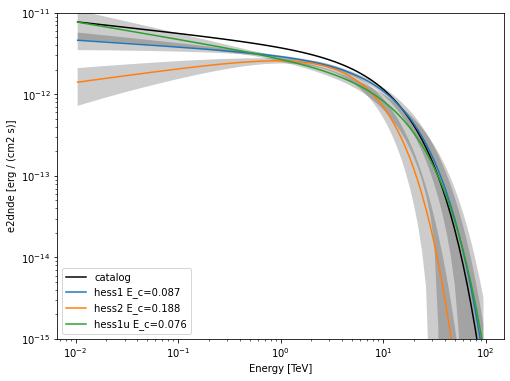

In [27]:
central_source = 'HESS J1745-290'

x_axis = hess.counts.geom.axes['energy'].center.value
energy_bounds = [0.01, 100] * u.TeV
sed_type = "e2dnde"

plt.figure(figsize=(8, 6))
ax = HGPS_models[central_source].spectral_model.plot(
    energy_bounds=energy_bounds, sed_type=sed_type, label="catalog", color='black')

for i, hess in enumerate(dataset_list):
    e_cutoff= hess.models[central_source].parameters['lambda_'].value
    hess.models[central_source].spectral_model.plot(ax=ax,
        energy_bounds=energy_bounds, sed_type=sed_type, label=f'{hesseras[i]} E_c={e_cutoff:.3f}')
    hess.models[central_source].spectral_model.plot_error(ax=ax, energy_bounds=energy_bounds, sed_type=sed_type)
plt.legend(loc='lower left')
plt.ylim(1e-15, 1e-11)

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/gammapy/maps/wcs/ndmap.py:372: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.imshow(data, **kwargs)


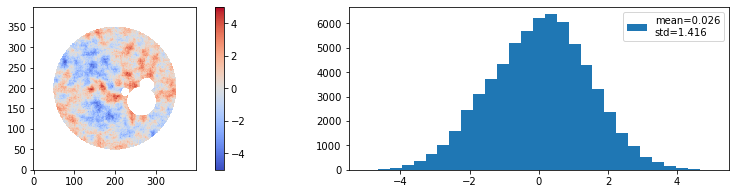

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/gammapy/maps/wcs/ndmap.py:372: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.imshow(data, **kwargs)


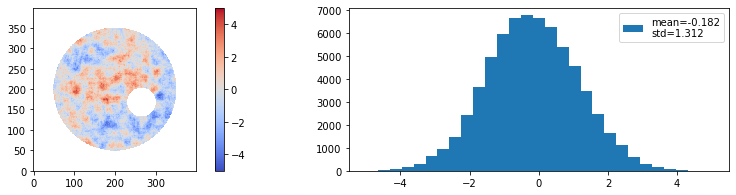

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/gammapy/maps/wcs/ndmap.py:372: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.imshow(data, **kwargs)


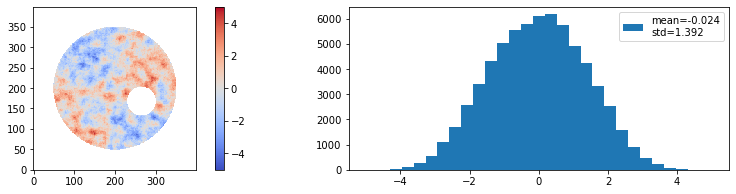

In [30]:
for i, hess in enumerate(dataset_list):
    estimator = ExcessMapEstimator(
        correlation_radius="0.2 deg",
        selection_optional=[],
        energy_edges=[0.1, 100] * u.TeV,
    )
    result = estimator.run(hess)

    fig, ax = plt.subplots(1,2, figsize=(15, 3))
    result["sqrt_ts"].plot(cmap="coolwarm", add_cbar=True, vmin=-5, vmax=5, ax=ax[0]);
    data=result["sqrt_ts"].data.ravel()
    ax[1].hist(data, bins=np.linspace(-5,5,30), label=f'mean={np.nanmean(data):.3f}\nstd={np.nanstd(data):.3f}');
    plt.legend()
    plt.show()

In [32]:
fp_list_sameebin = []
for i, hess in enumerate(dataset_list):
    fp_central = FluxPointsEstimator(
        energy_edges=hess.counts.geom.axes['energy'].edges,
        source=central_source,
    ).run([hess])
    fp_list_sameebin.append(fp_central)

Position <SkyCoord (Galactic): (l, b) in deg
    (358.27682495, 0.04908089)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (359.9448418, -0.04453293)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (358.64483643, -0.56421703)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (0.14, -0.114)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (358.44821167, -1.11440229)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (0.86684148, 0.07409131)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (0., 0.)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b

(1e-15, 1e-11)

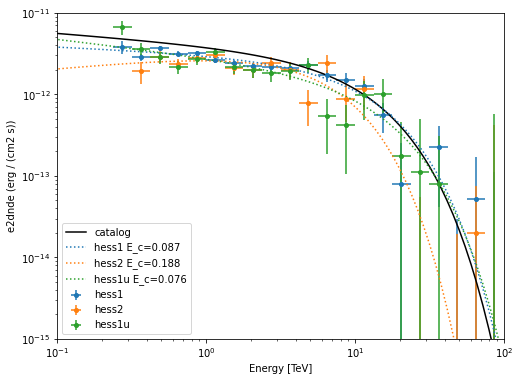

In [38]:
plt.figure(figsize=(8, 6))
ax = HGPS_models[central_source].spectral_model.plot(
    energy_bounds=energy_bounds, sed_type=sed_type, label="catalog", color='black')

for i, hess in enumerate(dataset_list):
    e_cutoff= hess.models[central_source].parameters['lambda_'].value
    hess.models[central_source].spectral_model.plot(ax=ax,color=f'C{i}', ls=':',
        energy_bounds=energy_bounds, sed_type=sed_type, label=f'{hesseras[i]} E_c={e_cutoff:.3f}')
    fp_list_sameebin[i].plot(sed_type=sed_type, color=f'C{i}', label=hesseras[i])

plt.legend(loc='lower left')
plt.ylim(1e-15, 1e-11)

In [39]:
fp_list_opt_ebin = []
for i, hess in enumerate(dataset_list):
    fp_central = FluxPointsEstimator(
        energy_edges=np.concatenate((hess.counts.geom.axes['energy'].edges[:17], [20, 80]*u.TeV)),
        source=central_source,
    ).run([hess])
    fp_list_opt_ebin.append(fp_central)

Position <SkyCoord (Galactic): (l, b) in deg
    (358.27682495, 0.04908089)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (359.9448418, -0.04453293)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (358.64483643, -0.56421703)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (0.14, -0.114)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (358.44821167, -1.11440229)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (0.86684148, 0.07409131)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (0., 0.)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b

(1e-15, 1e-11)

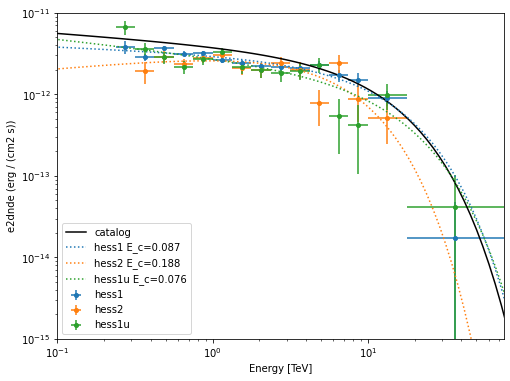

In [40]:
plt.figure(figsize=(8, 6))
ax = HGPS_models[central_source].spectral_model.plot(
    energy_bounds=energy_bounds, sed_type=sed_type, label="catalog", color='black')

for i, hess in enumerate(dataset_list):
    e_cutoff= hess.models[central_source].parameters['lambda_'].value
    hess.models[central_source].spectral_model.plot(ax=ax,color=f'C{i}', ls=':',
        energy_bounds=energy_bounds, sed_type=sed_type, label=f'{hesseras[i]} E_c={e_cutoff:.3f}')
    fp_list_opt_ebin[i].plot(sed_type=sed_type, color=f'C{i}', label=hesseras[i])

plt.legend(loc='lower left')
plt.ylim(1e-15, 1e-11)